In [8]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np

# Import libraries for machine learning modeling and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score ,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for decision tree visualization
from sklearn import tree

## Loading and Initial Exploration of the Dataset

In this section, we load the dataset using Pandas and perform an initial exploration to understand its structure, including the number of rows, columns, and types of data it contains.

In [9]:
# Load the dataset and display basic information
df = pd.read_csv('apple_quality.csv')

# Display the DataFrame's info and first few rows to understand its structure
df.info()
display(df.head())  # Using head() to show the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


## Data Cleaning

Before proceeding with the analysis, we need to clean the dataset. This includes removing unnecessary columns and addressing any issues with data types.


In [10]:
# Extract and store the 'Quality' and 'A_id' columns before removal
quality_column = df['Quality'][:4000].map({'good': 1, 'bad': 0})
id_column = df['A_id'][:4000]

# Drop 'Quality' and 'A_id' columns and keep the first 4000 rows
df = df.drop(['Quality', 'A_id'], axis=1)[:4000]

# Convert 'Acidity' column to numeric as it's incorrectly typed as 'object'
df['Acidity'] = pd.to_numeric(df['Acidity'])  # Using errors='coerce' to handle conversion errors


# Introduction and Potential Use Cases

This notebook aims to explore and analyze an Apple Quality dataset to derive valuable insights. Specifically, we'll focus on two primary use cases:

1. **Fruit Classification**: Categorizing apples based on their physical attributes and chemical properties.
2. **Quality Prediction**: Predicting the quality rating of apples using various attributes, which could be beneficial for quality control and sorting processes.


# Correlation Matrix

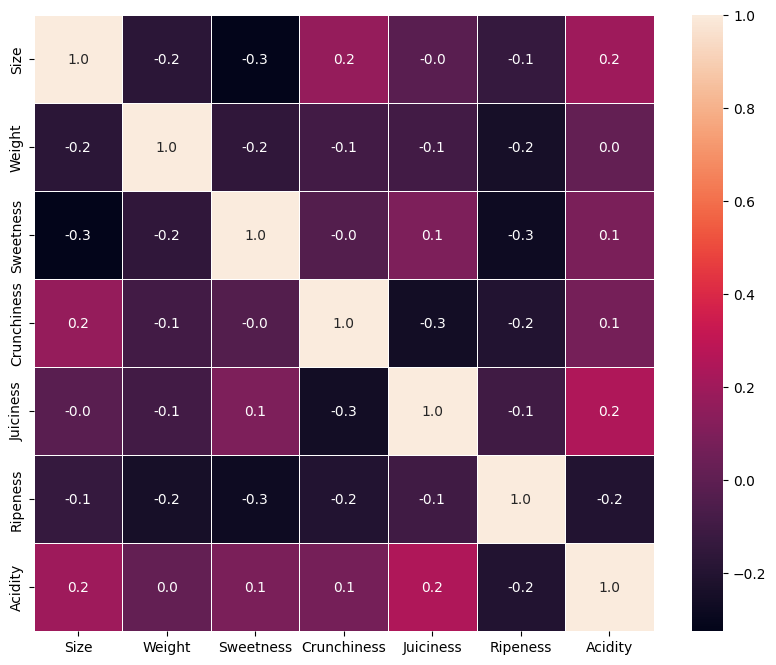

In [11]:
# Plot a correlation map
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## Preparing Data for Modeling

Before building our predictive models, we must prepare our dataset. This involves splitting the dataset into training and test sets, which will enable us to train our models and then evaluate their performance on unseen data.


In [12]:
# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(df, quality_column, test_size=0.2, random_state=0)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 3200 samples
Test set size: 800 samples


## Selecting a Machine Learning Model

In selecting a machine learning model for predicting apple quality, several factors need to be considered, including accuracy, interpretability, and computational efficiency. Our goal is to identify a model that balances these factors effectively, providing reliable predictions while being understandable and feasible to train on our dataset.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier 

In [16]:
# List of classifiers to try
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "SVM": SVC(C=1.0, kernel='rbf', gamma='scale'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(alpha=0.001, binarize=0.05),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', alpha=0.0001)  
}

In [ ]:
# List to store accuracy dataframes
accuracy_dfs = []

# Train, predict, and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the training set
    predictions_train = clf.predict(X_train)

    # Evaluate the training accuracy
    accuracy_train = accuracy_score(y_train, predictions_train)
    precision_train = precision_score(y_train, predictions_train)
    recall_train = recall_score(y_train, predictions_train)

    # Predict on the test set
    predictions_test = clf.predict(X_test)

    # Evaluate the testing accuracy
    accuracy_test = accuracy_score(y_test, predictions_test)
    precision_test = precision_score(y_test, predictions_test)
    recall_test = recall_score(y_test, predictions_test)


    # Create a DataFrame for the current classifier
    accuracy_df = pd.DataFrame({
        "Classifier": [clf_name],
        "Training Accuracy": [accuracy_train],
        "Training Precision": [precision_train],
        "Training Recall": [recall_train],
        "Testing Accuracy": [accuracy_test],
        "Testing Precision": [precision_test],
        "Testing Recall": [recall_test]
    })


    # Append the DataFrame to the list
    accuracy_dfs.append(accuracy_df)

# Concatenate all DataFrames into a single DataFrame
final_accuracy_df = pd.concat(accuracy_dfs, ignore_index=True)

In [18]:
display(final_accuracy_df.drop(['Training Precision', 'Training Recall', 'Training Accuracy'], axis=1))

,Classifier,Testing Accuracy,Testing Precision,Testing Recall
0,Logistic Regression,0.75250,0.722772,0.772487
1,Decision Tree,0.72500,0.651923,0.896825
2,Random Forest,0.83125,0.784543,0.886243
3,Gradient Boosting,0.86125,0.829630,0.888889
4,SVM,0.89500,0.858537,0.931217
5,K-Nearest Neighbors,0.89125,0.855746,0.925926
6,Gaussian Naive Bayes,0.75000,0.719212,0.772487
7,Bernoulli Naive Bayes,0.65875,0.622378,0.706349
8,LightGBM,0.89250,0.863184,0.917989
9,MLPClassifier,0.92625,0.914286,0.931217


# Hyperparameter Tuning
The MLP Classifier had the best accuracy on the test set. Let's see if we can improve it.

In [ ]:
param_dist = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(n,) for n in range(100, 300)]} # for 1 layer

clf = MLPClassifier(alpha=0.0001)

rand_search = RandomizedSearchCV(clf, 
                                 param_distributions=param_dist, 
                                 n_iter=2,  # Adjust based on your computational budget
                                 cv=2)  # Or another number, based on how thorough you want the cross-validation to be

rand_search.fit(X_train, y_train)

In [20]:
# Create a variable for the best model
best_clf  = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'hidden_layer_sizes': (290,), 'activation': 'relu'}


In [21]:
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC:", roc)

Accuracy: 0.9475
Precision: 0.9352331606217616
Recall: 0.955026455026455
ROC: 0.9478923744326587


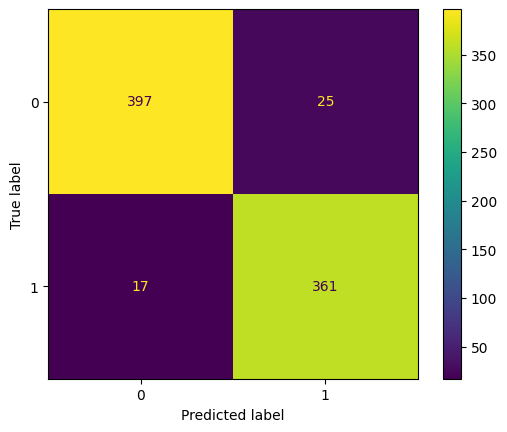

In [22]:
# Generate predictions with the best model
y_pred = best_clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Can we do a bit better?
Yes! Let's build a neural network to classify the apples using TensorFlow

In [130]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [57]:
sc = StandardScaler()

x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

# convert to tensor
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [118]:
# Define the neural network model architecture
model = tf.keras.Sequential([
    # input_shape specifies the shape of input data (x_train.shape[1],) represents the number of features.
    tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),   
    tf.keras.layers.Dropout(0.5),

    # Output layer with a single unit and sigmoid activation function for binary classification.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with specified optimizer, loss function, and evaluation metric(s)
model.compile(optimizer='adam',    # Optimizer (Adam)
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])        # Evaluation metric(s), accuracy in this case

# Display a summary of the model architecture, including the number of parameters
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 256)               2048      
                                                                 
 dropout_66 (Dropout)        (None, 256)               0         
                                                                 
 dense_99 (Dense)            (None, 256)               65792     
                                                                 
 dropout_67 (Dropout)        (None, 256)               0         
                                                                 
 dense_100 (Dense)           (None, 1)                 257       
                                                                 
Total params: 68097 (266.00 KB)
Trainable params: 68097 (266.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
# Define callbacks for model training
callbacks = [
    # ReduceLROnPlateau callback: Reduces learning rate when validation accuracy stops improving
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',  # Metric to monitor (validation accuracy)
        patience=20,             # Number of epochs with no improvement before reducing learning rate
        verbose=0,               # Verbosity mode (0: silent, 1: progress bar, 2: one line per epoch)
        factor=0.9               # Factor by which the learning rate will be reduced
    ),
    
    # EarlyStopping callback: Stops training when validation accuracy stops improving
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',  # Metric to monitor (validation accuracy)
        patience=50,             # Number of epochs with no improvement before stopping training
        verbose=0,               # Verbosity mode (0: silent, 1: progress bar, 2: one line per epoch)
        restore_best_weights=True  # Whether to restore model weights to the best weights found during training
    )
]

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0, callbacks=callbacks)

In [120]:
model.evaluate(test_ds)

25/25 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.9513


[0.15712271630764008, 0.9512500166893005]

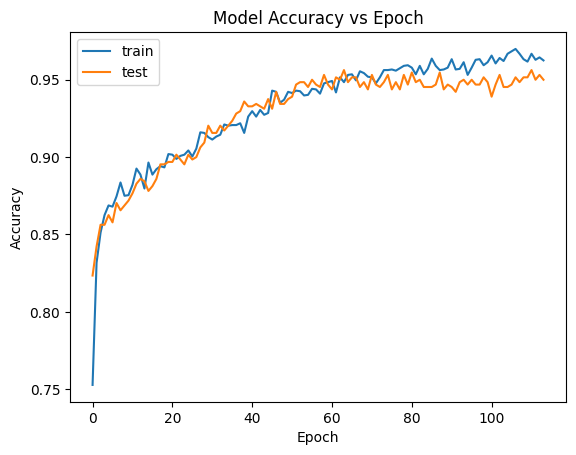

In [128]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

25/25 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       422
           1       0.94      0.96      0.95       378

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800

